In [41]:
import pandas as pd
import numpy as np

In [42]:

def euler_method(x, y_init, step, foo):
    y = np.zeros_like(x)
    y[0] = y_init

    for i in range(1, len(x)):
        y[i] = y[i - 1] + step * foo(x[i - 1], y[i - 1])

    return y


def euler_cauchy_method(x, y_init, step, foo):
    y = np.zeros_like(x)
    y[0] = y_init

    for i in range(1, len(x)):
        y_t = y[i - 1] + step * foo(x[i - 1], y[i - 1])
        y[i] = (
            y[i - 1]
            + step * (foo(x[i - 1], y[i - 1]) + foo(x[i], y_t)) / 2
        )

    return y


def runge_kutta_method(x, y_init, step, foo):
    y = np.zeros_like(x)
    y[0] = y_init

    for i in range(0, len(x) - 1):
        k_1 = step * foo(x[i], y[i])
        k_2 = step * foo(x[i] + 1 / 2 * step, y[i] + 1 / 2 * k_1)
        k_3 = step * foo(x[i] + 1 / 2 * step, y[i] + 1 / 2 * k_2)
        k_4 = step * foo(x[i] + step, y[i] + k_3)

        dy = 1 / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        y[i + 1] = y[i] + dy

    return y


def adam_method(x, y_init, step, foo, init_method=runge_kutta_method):
    y = np.zeros_like(x)
    y[0] = y_init
    # Calc 3 values by other method
    prec_y = init_method(x[:4], y_init, step, foo)
    y = np.concatenate([prec_y, y[4:]], axis=0)

    for i in range(4, len(y)):
        y[i] = y[i - 1] + step / 24 * (
            55 * foo(x[i - 1], y[i - 1])
            - 59 * foo(x[i - 2], y[i - 2])
            + 37 * foo(x[i - 3], y[i - 3])
            - 9 * foo(x[i - 4], y[i - 4])
        )

    return y


In [43]:
y_start = 0
x_start, x_end = 0, 1
step = 0.1

def f_drv(x, y):
    return (x + y) ** 2

x = np.arange(x_start, x_end + step, step)

df = pd.DataFrame({"x": x})
df["Euler"] = euler_method(x, y_start, step, f_drv)
df["Euler-Cauchy"] = euler_cauchy_method(x, y_start, step, f_drv)
df["Runge-Kutta"] = runge_kutta_method(x, y_start, step, f_drv)
df["Multistep Adams"] = adam_method(x, y_start, step, f_drv, runge_kutta_method)
df["Exact solution"] = np.tan(x) - x

print(df)


      x     Euler  Euler-Cauchy  Runge-Kutta  Multistep Adams  Exact solution
0   0.0  0.000000      0.000000     0.000000         0.000000        0.000000
1   0.1  0.000000      0.000500     0.000335         0.000335        0.000335
2   0.2  0.001000      0.003035     0.002710         0.002710        0.002710
3   0.3  0.005040      0.009814     0.009336         0.009336        0.009336
4   0.4  0.014345      0.023408     0.022793         0.022715        0.022793
5   0.5  0.031513      0.047024     0.046302         0.046098        0.046302
6   0.6  0.059764      0.084899     0.084137         0.083725        0.084137
7   0.7  0.103293      0.142949     0.142289         0.141502        0.142288
8   0.8  0.167821      0.229887     0.229639         0.228134        0.229639
9   0.9  0.261488      0.359299     0.360159         0.357182        0.360158
10  1.0  0.396394      0.553790     0.557406         0.551160        0.557408


<AxesSubplot:xlabel='x'>

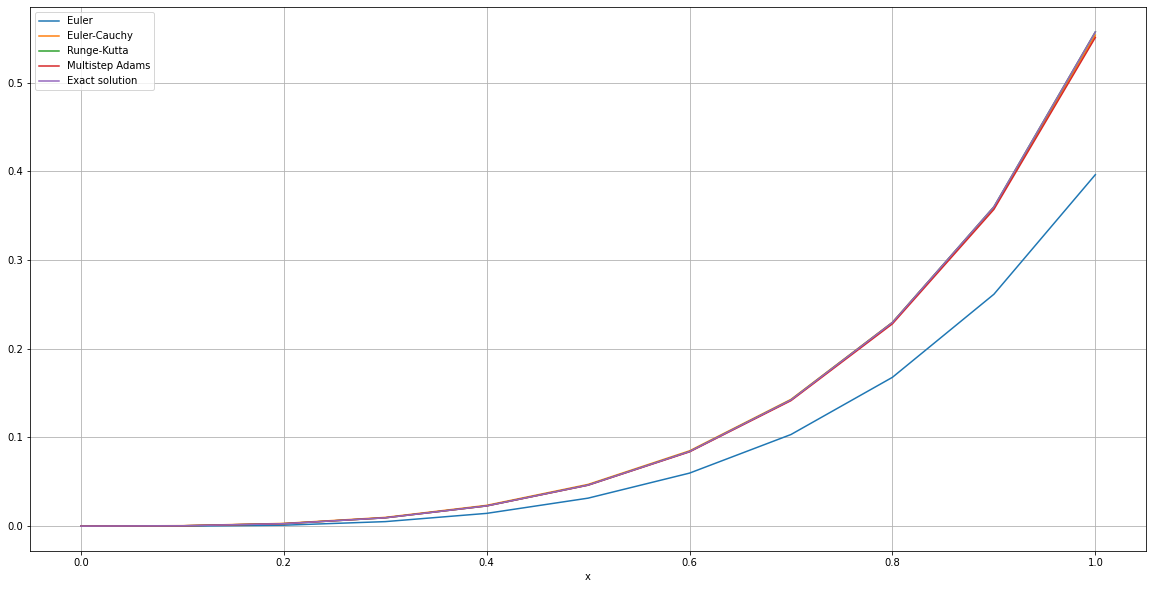

In [45]:
df.plot(
    x="x",
    figsize=(20,10),
    grid=True
)
